# About the Project
### The objective of the project is to carry out an Exploratory Data Analysis (EDA) and try to understand how this dataset works and what information we can take from it.

In [95]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing Data Set

In [2]:
dataset = pd.read_csv('netflix_daily_top_10.csv')

### Data Set Visualization

In [3]:
dataset.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
dataset.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


### Data Set Shape

In [5]:
dataset.shape

(7100, 10)

### Period Analysis

In [6]:
start = pd.to_datetime(dataset['As of']).dt.date.min()
print(start)

2020-04-01


In [7]:
end = pd.to_datetime(dataset['As of']).dt.date.max()
print(end)

2022-03-11


### Checking Nulls and Datatype

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [9]:
dataset.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

### Null Records

In [10]:
dataset.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [11]:
dataset['Netflix Exclusive'].value_counts()

Yes    4599
Name: Netflix Exclusive, dtype: int64

#### We can see here that the Null values actually are the titles that aren't Netflix Exclusives
#### So I'm going to deal with the null values by changing them to "No". This way i can plot a chart with Netflix Exclusive titles and those that are not.

In [12]:
newdataset = dataset
newdataset.fillna('No', inplace=True)
newdataset.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [33]:
county = 0
countn = 0
for i in newdataset['Netflix Exclusive']:
    if i == 'Yes':
        county += 1
    else:
        countn += 1

4599
2501


In [96]:
newdataset1 = newdataset['Netflix Exclusive']
newdataset2 = pd.DataFrame(newdataset1)
newdataset2['Count'] = 0
for i , ne in enumerate(newdataset2['Netflix Exclusive']):
    if ne == 'Yes':
        newdataset2['Count'][i] = county
    if ne == 'No':
        newdataset2['Count'][i] = countn
newdataset2

,Netflix Exclusive,Count
0,Yes,4599
1,Yes,4599
2,No,2501
3,No,2501
4,Yes,4599
...,...,...
7095,Yes,4599
7096,Yes,4599
7097,No,2501
7098,No,2501


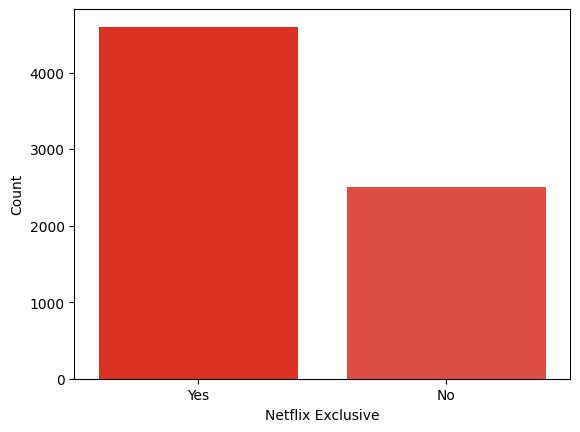

In [102]:
sns.barplot(data=newdataset2, x='Netflix Exclusive', y='Count', palette = ['#fc1705', '#f73728']);

### Statistics 

In [13]:
newdataset.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


#### Charts

#### Boxplot 

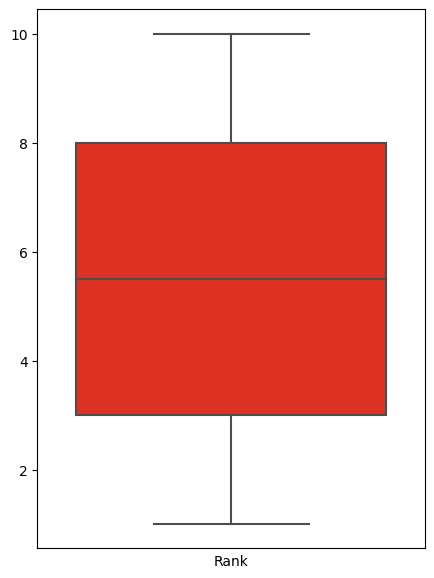

In [106]:
color1 = '#fc1705'
plt.figure(figsize=(5, 7))
sns.boxplot(data=newdataset['Rank'],color=color1)
plt.xticks(ticks=[])
plt.xlabel('Rank');

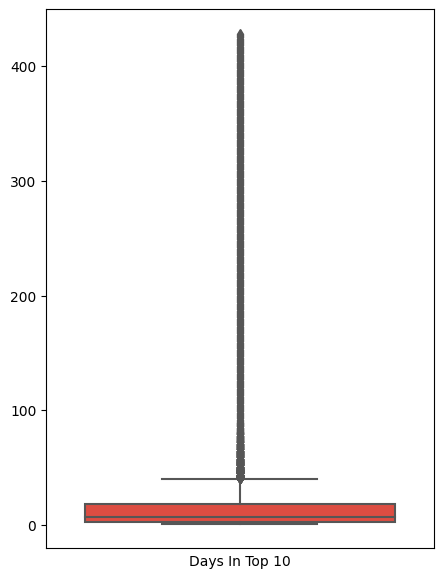

In [105]:
color2 ='#f73728'
plt.figure(figsize=(5, 7))
sns.boxplot(data=newdataset['Days In Top 10'],color=color2)
plt.xticks(ticks=[])
plt.xlabel('Days In Top 10');

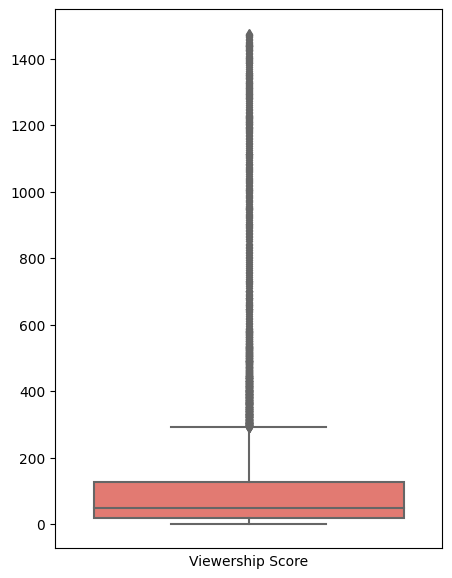

In [104]:
color3 = '#f56a5f'
plt.figure(figsize=(5, 7))
sns.boxplot(data=newdataset['Viewership Score'], color=color3)
plt.xticks(ticks=[])
plt.xlabel('Viewership Score');

##### Analyzing the Boxplots we can see a high value of Outliers, let's try to understand them

#### Outliers

In [17]:
newdataset[newdataset['Days In Top 10'] >= 100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,No,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,No,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,No,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,No,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,No,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,No,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,No,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",427,1472


In [18]:
newdataset.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

#### We can conclude that the high number of Outliers was due to the title Cocomelon which was a great success

### Analyzing the Types

In [19]:
newdataset.Type.value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64

In [20]:
ntype = {'TV Show':[4446], 'Movie':[2611], 'Stand-Up Comedy':[41],'Concert/Perfomance':[2]} 
ntype1 = pd.DataFrame(ntype)

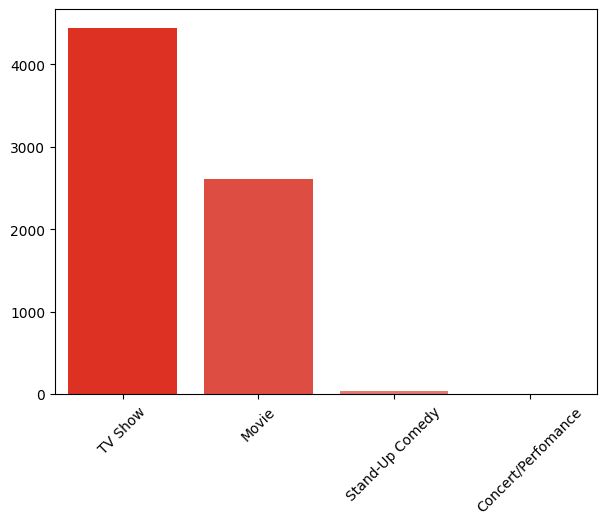

In [101]:
colorbar = ['#8f1128', '#b31532', '#cc1b3b', '#eb2145']
plt.figure(figsize=(7, 5))
sns.barplot(data=ntype1, palette = ['#fc1705', '#f73728', '#f56a5f'])
plt.xticks(rotation=45);

### Analyzing Viewership Score

#### Acessing the website: www.the-numbers.com/netflix-top-10 (From which the dataset was taken). We can see this explanation about the Viewership Score: "The Viewership Score is a score assigned to each show based on its historical daily ranking, assigning 10 points for each no. 1 ranking, 9 points for each no. 2 ranking etc."

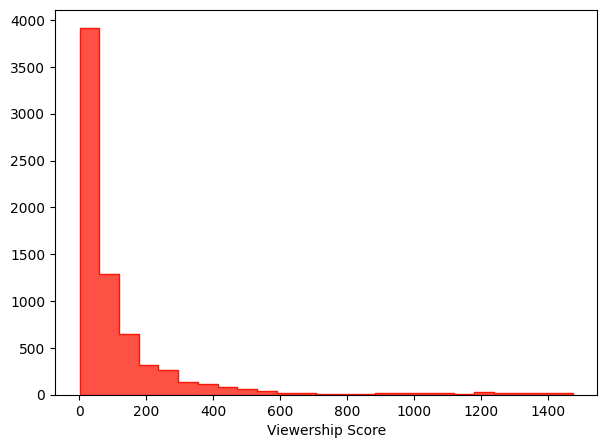

In [107]:
plt.figure(figsize=(7, 5))
sns.histplot(newdataset['Viewership Score'], bins=25, element='step', color='#fc1705')
plt.ylabel(ylabel=''); 

In [23]:
newdataset[newdataset['Viewership Score'] == newdataset['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474


#### We can conclude that most Titles don't stay in the TOP 10 for long and have lower Scores and the Title with the highest score is Cocomelon